In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
#Label Encoder
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])
df["Gender"] = le.fit_transform(df["Gender"])
df["EverBenched"] = le.fit_transform(df["EverBenched"])
df["City"] = le.fit_transform(df["City"])

In [ ]:
#get dummies
#df = pd.get_dummies(df, columns=["City"],drop_first=True)

In [ ]:
df = df.replace([True,False],[1,0])

In [ ]:
df["JoiningYear"] = df["JoiningYear"].apply(lambda x : 2018 - x)
df.rename(columns={"JoiningYear" : "WorkingYear"} , inplace= True)

In [ ]:
df.head(10)

,Education,WorkingYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,1,0,3,34,1,0,0,0
1,0,5,2,1,28,0,0,3,1
2,0,4,1,3,38,0,0,2,0
3,1,2,0,3,27,1,0,5,1
4,1,1,2,3,24,1,1,2,1
5,0,2,0,3,22,1,0,0,0
6,0,3,1,3,38,1,0,0,0
7,0,2,0,3,34,0,0,2,1
8,0,2,2,3,23,1,0,1,0
9,1,1,1,2,37,1,0,2,0


In [ ]:
ss = StandardScaler()
df[["Age"]] = ss.fit_transform(df[["Age"]])
df.head(3)

,Education,WorkingYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,1,0,3,0.954645,1,0,0,0
1,0,5,2,1,-0.288732,0,0,3,1
2,0,4,1,3,1.783563,0,0,2,0


In [ ]:
df.Age.std()

1.0001074748780576

In [ ]:
df.corr()

,Education,WorkingYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,-0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
WorkingYear,-0.142670,1.000000,-0.051441,0.096078,-0.013165,0.012213,-0.049353,0.036525,-0.181705
City,0.149903,-0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,-0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,-0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,-0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


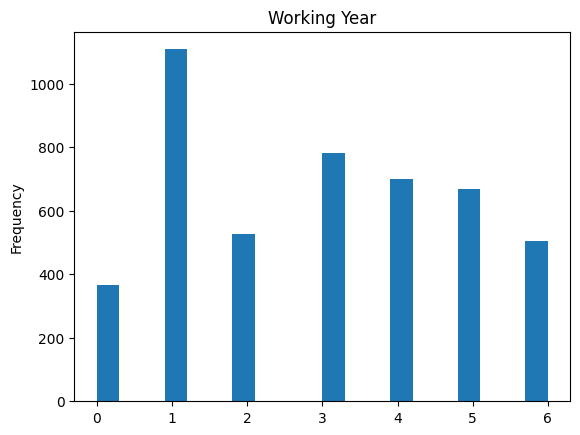

In [ ]:
df['WorkingYear'].plot(kind='hist', bins=20, title='Working Year')
plt.show()

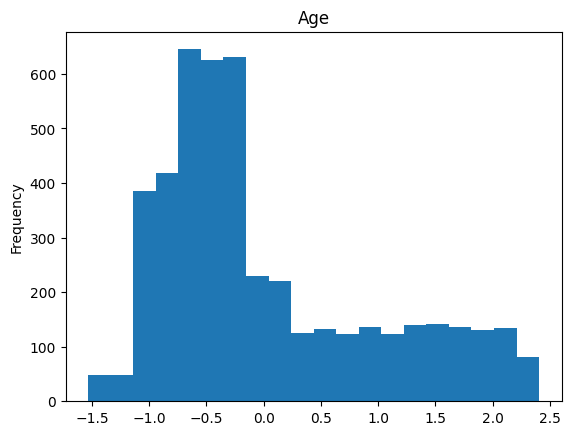

In [ ]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.show()

In [ ]:
X_sample = df.drop(["LeaveOrNot"],axis = 1)
y_sample = df.LeaveOrNot

print(X_sample.shape)

(4653, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size= 0.2, random_state = 28)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25, random_state = 28)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2791, 8)
(931, 8)
(931, 8)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 800, random_state = 42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       590
           1       0.82      0.66      0.73       341

    accuracy                           0.82       931
   macro avg       0.82      0.79      0.80       931
weighted avg       0.82      0.82      0.82       931



In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[542,  48],
       [117, 224]])

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma=0.52)
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8302900107411385

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       590
           1       0.89      0.62      0.73       341

    accuracy                           0.83       931
   macro avg       0.85      0.79      0.80       931
weighted avg       0.84      0.83      0.82       931



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model = GaussianNB()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6928034371643395

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       590
           1       0.61      0.45      0.52       341

    accuracy                           0.69       931
   macro avg       0.67      0.64      0.65       931
weighted avg       0.68      0.69      0.68       931



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,22,2):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_test_pred = model.predict(X_test)
  model.score(X_test,y_test)
  print(f"{i} => {model.score(X_val,y_val)}")
y_test_pred = model.predict(X_test)

1 => 0.7583243823845328
3 => 0.7765843179377014
5 => 0.7894736842105263
7 => 0.8131041890440387
9 => 0.807733619763695
11 => 0.8002148227712137
13 => 0.8098818474758325
15 => 0.8109559613319012
17 => 0.807733619763695
19 => 0.8012889366272825
21 => 0.7959183673469388


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       590
           1       0.82      0.60      0.69       341

    accuracy                           0.81       931
   macro avg       0.81      0.76      0.78       931
weighted avg       0.81      0.81      0.80       931

